# Dane ustrukturyzowane

Dane klienta to pewne wartości, które możesz przypisać do zmiennych: 
np wiek: 42, wzrost: 178, pozyczka: 1000, zarobki: 5000, imię: Jan

Zdefiniuj zmienne customer_1_{cecha} i przypisz im wartości z przykładu powyżej

In [1]:
customer_1_wiek = 42
customer_1_wzrost = 178
customer_1_pozyczka = 1000
customer_1_zarobki = 5000
customer_1_imie = 'Jan'

> dlaczego do analizy danych nie używamy zmiennych? 

> Niezależnie od typu analizowanych i przetwarzanych danych w Pythonie możemy zebrać dane i reprezentować je jako pewna formy `listy`. 

In [2]:
customer_1 = [42,178,1000,5000,'Jan']

> dlaczego listy nie są najlepszym miejscem na przechowywanie danych?

Weźmy dwie listy numeryczne

In [3]:
a = [1,2,3]
b = [4,5,6]

In [4]:
# dodawanie list
print(f"a+b: {a+b}")
# można też użyć metody format
print("a+b: {}".format(a+b))

a+b: [1, 2, 3, 4, 5, 6]
a+b: [1, 2, 3, 4, 5, 6]


In [5]:
# mnożenie list
try:
    print(a*b)
except TypeError:
    print("no-defined operation")

no-defined operation


Każdy obiekt pythonowy można rozszerzyć o nowe metody i atrybuty.

In [6]:
import numpy as np
aa = np.array(a)
bb = np.array(b)

print(aa,bb)

[1 2 3] [4 5 6]


In [7]:
print(f"aa+bb: {aa+bb}")
# dodawanie działa
try:
    print("="*50)
    print(aa*bb)
    print("aa*bb - czy to poprawne mnożenie?")
    print(np.dot(aa,bb))
    print("np.dot - a czy otrzymany wynik też realizuje poprawne mnożenie?")
except TypeError:
    print("no-defined operation")
# mnożenie również działa

aa+bb: [5 7 9]
[ 4 10 18]
aa*bb - czy to poprawne mnożenie?
32
np.dot - a czy otrzymany wynik też realizuje poprawne mnożenie?


Co działa szybciej?


In [8]:
def iloczyn_skalarny_lista(x: list, y: list) -> float: 
    iloczyn = 0.
    for i in range(len(x)):
        iloczyn += x[i] * y[i]
    return iloczyn

a = list(range(1000))
b = list(range(1000))

%timeit iloczyn_skalarny_lista(a, b)

27.9 μs ± 1.22 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
import numpy as np
def iloczyn_skalarny_numpy(x, w):
    return x.dot(w)
    
a = np.arange(1000)
b = np.arange(1000)

%timeit iloczyn_skalarny_numpy(a, b)

545 ns ± 3.29 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [10]:
# własności tablic
x = np.array(range(4))
print(x)
x.shape

A = np.array([range(4),range(4)])
# transposition  row i -> column j, column j -> row i 
A.T

# 0-dim object
scalar = np.array(5)
print(f"scalar object dim: {scalar.ndim}")
# 1-dim object
vector_1d = np.array([3, 5, 7])
print(f"vector object dim: {vector_1d.ndim}")
# 2 rows for 3 features
matrix_2d = np.array([[1,2,3],[3,4,5]])
print(f"matrix object dim: {matrix_2d.ndim}")

[0 1 2 3]
scalar object dim: 0
vector object dim: 1
matrix object dim: 2


Obliczenia wykonywane na danych mieszczących się w pamięci. 
> czy można jeszcze przyśpieszyć obliczenia? 



[Kurs Numpy ze strony Sebastiana Raschki](https://sebastianraschka.com/blog/2020/numpy-intro.html)


## PyTorch 

[PyTorch](https://pytorch.org) is an open-source Python-based deep learning library. 
PyTorch has been the most widely used deep learning library for research since 2019 by a wide margin. In short, for many practitioners and researchers, PyTorch offers just the right balance between usability and features.

1. PyTorch is a `tensor` library that extends the concept of array-oriented programming library NumPy with the additional feature of accelerated computation on GPUs, thus providing a seamless switch between CPUs and GPUs.

2. PyTorch is an `automatic differentiation engine`, also known as autograd, which enables the automatic computation of gradients for tensor operations, simplifying backpropagation and model optimization.

3. PyTorch is a deep learning library, meaning that it offers modular, flexible, and efficient building blocks (including pre-trained models, loss functions, and optimizers) for designing and training a wide range of deep learning models, catering to both researchers and developers.


In [12]:
import torch

print(torch.__version__)

print(torch.cuda.is_available())
print(torch.backends.mps.is_available())

tensor0d = torch.tensor(1) 
tensor1d = torch.tensor([1, 2, 3])
tensor2d = torch.tensor([[1, 2, 2], [3, 4, 5]])
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

2.6.0
False
True


In [13]:
# typy
print(tensor1d.dtype)

print(torch.tensor([1.0, 2.0, 3.0]).dtype)

torch.int64
torch.float32


In [14]:
tensor2d.shape
print(tensor2d.reshape(3, 2))
print(tensor2d.view(3, 2))

tensor([[1, 2],
        [2, 3],
        [4, 5]])
tensor([[1, 2],
        [2, 3],
        [4, 5]])


In [15]:
print(tensor2d.T)

tensor([[1, 3],
        [2, 4],
        [2, 5]])


In [16]:
print(tensor2d.matmul(tensor2d.T))

print(tensor2d @ tensor2d.T)

tensor([[ 9, 21],
        [21, 50]])
tensor([[ 9, 21],
        [21, 50]])


szczegółowe info znajdziesz w [dokumentacji](https://pytorch.org/docs/stable/tensors.html)

## Modelowanie danych ustrukturyzowanych

Rozważmy jedną zmienną (`xs`) od której zależy nasza zmienna wynikowa (`ys` - target).
```python
xs = np.array([-1,0,1,2,3,4])
ys = np.array([-3,-1,1,3,5,7])
```


Modelem który możemy zastosować jest regresja liniowa.

In [17]:
# Regresja liniowa 

import numpy as np
from sklearn.linear_model import LinearRegression

xs = np.array([-1,0,1,2,3,4])
# a raczej 
xs = xs.reshape(-1, 1)

ys = np.array([-3, -1, 1, 3, 5, 7])

reg = LinearRegression()
model = reg.fit(xs,ys)

print(f"solution: x1={model.coef_[0]}, x0={reg.intercept_}")

model.predict(np.array([[1],[5]]))

solution: x1=2.0, x0=-1.0


array([1., 9.])

Prosty kod realizuje w pełni nasze zadanie znalezienia modelu regresji liniowej. 

Do czego może nam posłużyc tak wygenerowany model? 

Aby z niego skorzystac potrzebujemy wyeksportować go do pliku.

Wykorzystaj bibliotekę pickle w celu zapisu obiektu modelu

In [18]:
# save model
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(model, picklefile)

Teraz możemy go zaimportować (np na Github) i wykorzystać w innych projektach. 

In [19]:
# load model
with open('model.pkl',"rb") as picklefile:
    mreg = pickle.load(picklefile)

In [20]:
mreg.predict(xs)

array([-3., -1.,  1.,  3.,  5.,  7.])

In [21]:
from torch.nn import Linear
x_t = torch.tensor([1,2,3,4,5]).view(-1,1)
x_t=x_t.to(torch.float32)
m = Linear(1,1)
m(torch.tensor([1.]))

tensor([-0.5447], grad_fn=<ViewBackward0>)

In [22]:
m(x_t)

tensor([[-0.5447],
        [-0.8818],
        [-1.2190],
        [-1.5562],
        [-1.8934]], grad_fn=<AddmmBackward0>)

In [23]:
# forward 
import torch.nn.functional as F

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b  = torch.tensor([0.2], requires_grad=True)
z = x1 * w1 + b
a = torch.sigmoid(z)
loss = F.binary_cross_entropy(a,y)

# automatic diff 
from torch.autograd import grad

grad_L_w1 = grad(loss, w1, retain_graph= True)
grad_L_b = grad(loss, b, retain_graph= True)

loss.backward()
print(w1.grad)

tensor([-0.0746])


In [24]:
class LinearRegression(torch.nn.Module):
    def __init__(self, n_input:int, n_output: int):
        super(LinearRegression, self).__init__()

        self.layers = torch.nn.Sequential(
                torch.nn.Linear(n_input, n_output)
        )
    def forward(self, x):
        return self.layers(x)

In [25]:
x = np.array(xs, dtype=np.float32)
y = np.array(ys, dtype=np.float32)

X_train = torch.from_numpy(x).view(-1,1)
y_train = torch.from_numpy(y).view(-1,1)

In [26]:
lr_model = LinearRegression(1,1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

In [27]:
num_params = sum(p.numel() for p in lr_model.parameters() if p.requires_grad)
print(f"liczba trenowalnych parametrów: {num_params}")

liczba trenowalnych parametrów: 2


In [28]:
for layer in lr_model.layers:
    if isinstance(layer, torch.nn.Linear):
        print(f"weight: {layer.state_dict()['weight']}")
        print(f"bias: {layer.state_dict()['bias']}")

weight: tensor([[0.0460]])
bias: tensor([0.4732])


In [29]:
epochs = 10
# petla uczaca 
for epoch in range(epochs):
    lr_model.train() # etap trenowania 

    y_pred = lr_model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1:03d}, loss = {loss.item():.2f}')
 
    lr_model.eval() # etap ewaluacji modelu

# po treningu jeszcze raz generujemy predykcje
lr_model.eval()
with torch.no_grad():
    predicted = lr_model(X_train)

In [30]:
lr_model.layers[0].weight, lr_model.layers[0].weight.shape

(Parameter containing:
 tensor([[1.0423]], requires_grad=True),
 torch.Size([1, 1]))

## Inne sposoby pozyskiwania danych 

1. Gotowe źródła w bibliotekach pythonowych
2. Dane z plików zewnętrznych (np. csv, json, txt) z lokalnego dysku lub z internetu
3. Dane z bazy danych (np. MySQL, PostgreSQL, MongoDB)
4. Dane generowane w sposób sztuczny pod wybrany problem modelowy. 
5. Strumienie danych 

In [31]:
from sklearn.datasets import load_iris

iris = load_iris()

# find all keys
print(iris.keys())

# print description
print(iris.DESCR)


import pandas as pd
import numpy as np

# create DataFrame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [32]:
# show last
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [33]:
# show info about NaN values and a type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [34]:
# statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
# new features
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [36]:
# remove features (columns) 
df = df.drop(columns=['target'])
# filtering first 100 rows and 4'th column

<Axes: xlabel='measurement', ylabel='value'>

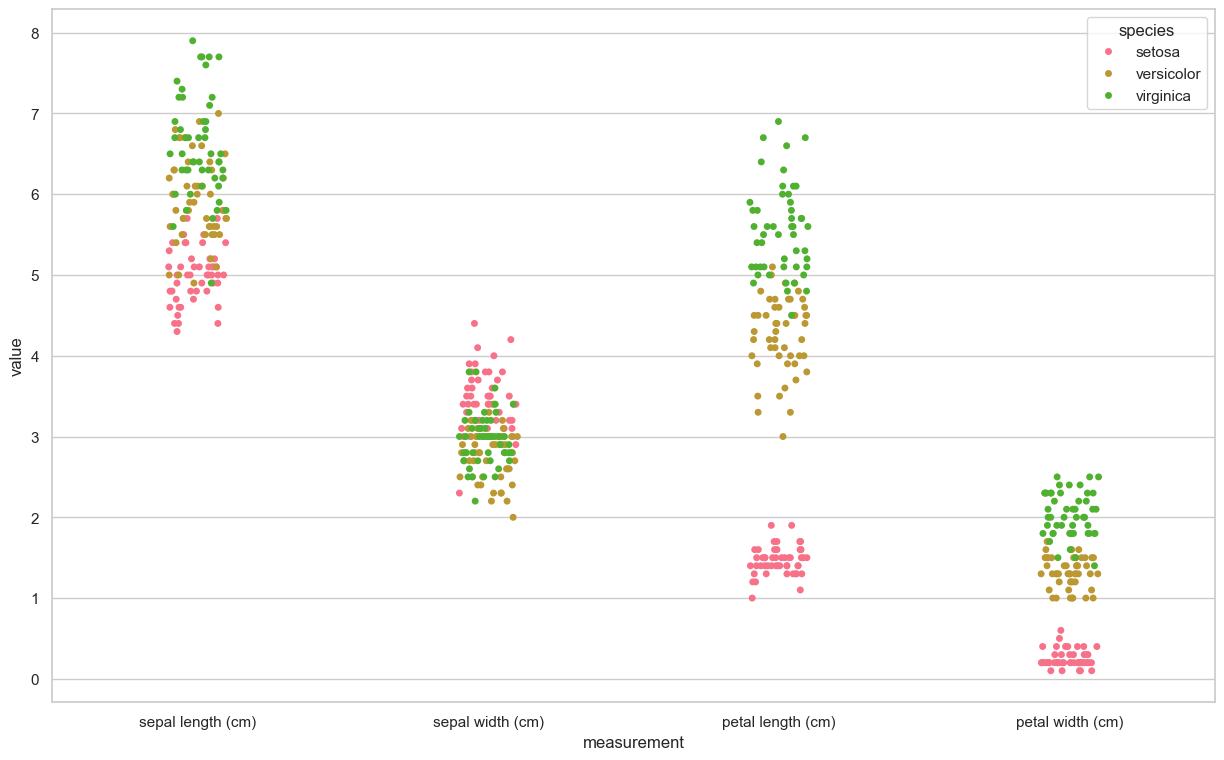

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl")

iris_melt = pd.melt(df, "species", var_name="measurement")
f, ax = plt.subplots(1, figsize=(15,9))
sns.stripplot(x="measurement", y="value", hue="species", data=iris_melt, jitter=True, edgecolor="white", ax=ax)

In [38]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[0:100,4].values

y = np.where(y == 'setosa',-1,1)

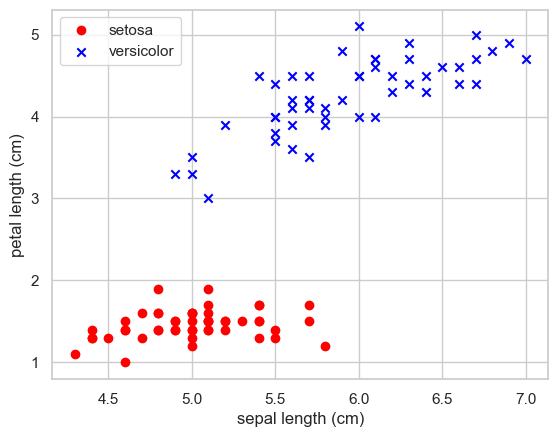

In [39]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

In [40]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5],[4,5.5]])
y_pred

array([-1,  1])

źródła zewnętrzne

In [41]:
IRIS_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(IRIS_PATH, names=col_names)

In [43]:
# save to sqlite
import sqlite3
# generate database
conn = sqlite3.connect("iris.db")
# pandas to_sql

try:
    df.to_sql("iris", conn, index=False)
except:
    print("tabela już istnieje")

tabela już istnieje


In [44]:
result = pd.read_sql("SELECT * FROM iris WHERE sepal_length > 5", conn)

Sztuczne dane


In [45]:
# Dane sztucznie generowane
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10**4,
n_features=20, n_informative=2, n_redundant=2)


from sklearn.ensemble import RandomForestClassifier


# podział na zbiór treningowy i testowy
train_samples = 7000 # 70% danych treningowych

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.predict(X_train[0].reshape(1, -1))

array([0])

Analiza Laboratorium 3 - Chatgbt

1. Praca z danymi ustrukturyzowanymi:

Ćwiczenia rozpoczynają się od reprezentacji danych klienta za pomocą zmiennych, list i struktur NumPy. 
Dzięki temu studenci uczą się, dlaczego listy nie są optymalne do przechowywania danych oraz jakie korzyści niesie ze sobą użycie tablic NumPy, takie jak efektywność obliczeniowa i możliwość wykonywania operacji wektorowych.

2. Wprowadzenie do PyTorch:

Laboratorium wprowadza podstawy biblioteki PyTorch, prezentując jej możliwości w zakresie obliczeń tensorowych oraz automatycznego różniczkowania. To przygotowuje studentów do bardziej zaawansowanych zastosowań, takich jak budowa i trenowanie modeli uczenia maszynowego. ￼

Propozycje rozszerzeń

Propozycje do pracy dla studentów jako rozszerzenia: 

- Integracja z Pandas: Wprowadzenie biblioteki Pandas do pracy z danymi tabelarycznymi pozwoliłoby studentom lepiej zrozumieć manipulację danymi i ich przygotowanie do analizy. 

> Pandas DataFrames został omówiony jako podobieństwo obiektów pythona do tabel SQL. 

- Wizualizacja danych: Dodanie ćwiczeń z wykorzystaniem bibliotek takich jak Matplotlib czy Seaborn umożliwiłoby studentom lepsze zrozumienie danych poprzez ich graficzną reprezentację.

> Częściowe przykłady pokazują jak wykorzystać analizę danych za pomocą bibliotek takich jak Matplotlib czy Seaborn, oraz jak interpretować otrzymywane wyniki.

- Praktyczne zastosowania: Zaproponowanie mini-projektu, w którym studenci analizują rzeczywiste dane (np. dane finansowe czy dane z mediów społecznościowych) przy użyciu poznanych narzędzi, zwiększyłoby zaangażowanie i pokazało praktyczne zastosowanie zdobytej wiedzy.

> Projekt analizy danych tabelarycznych realizowany jest jako jedno z zadań domowych.

- Porównanie z innymi bibliotekami: Przedstawienie różnic między NumPy, PyTorch i TensorFlow w kontekście analizy danych mogłoby pomóc studentom w wyborze odpowiednich narzędzi do konkretnych zadań.

Podsumowanie

Laboratorium 3 stanowi solidne wprowadzenie do pracy z danymi ustrukturyzowanymi i wykorzystania bibliotek NumPy oraz PyTorch. Dodanie powyższych rozszerzeń mogłoby jeszcze bardziej zwiększyć wartość edukacyjną zajęć, przygotowując studentów do realnych wyzwań w analizie danych w czasie rzeczywistym.